Ionosphere Data Problem

Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tp
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers
from sklearn.model_selection import train_test_split
print (tf.__version__)

2.4.1


# Load Data

In [ ]:
data=pd.read_csv("/content/ionosphere_data.csv")

# Data Analysis

In [ ]:
data.head()

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,feature16,feature17,feature18,feature19,feature20,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34,label
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,0.85243,-0.17755,0.59755,-0.44945,0.60536,-0.38223,0.84356,-0.38542,0.58212,-0.32192,0.56971,-0.29674,0.36946,-0.47357,0.56811,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,0.50874,-0.67743,0.34432,-0.69707,-0.51685,-0.97515,0.05499,-0.62237,0.33109,-1.00000,-0.13151,-0.45300,-0.18056,-0.35734,-0.20332,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,0.73082,0.05346,0.85443,0.00827,0.54591,0.00299,0.83775,-0.13644,0.75535,-0.08540,0.70887,-0.27502,0.43385,-0.12062,0.57528,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,-1.00000,0.14516,0.54094,-0.39330,-1.00000,-0.54467,-0.69975,1.00000,0.00000,0.00000,1.00000,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,0.52798,-0.20275,0.56409,-0.00712,0.34395,-0.27457,0.52940,-0.21780,0.45107,-0.17813,0.05982,-0.35575,0.02309,-0.52879,0.03286,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g


In [ ]:
data.shape

(351, 35)

There are 35 Columns. 34 Columns have features and Last Column is the Label with (g = good and b = bad). 351 Rows of data.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351 entries, 0 to 350
Data columns (total 35 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   feature1   351 non-null    int64  
 1   feature2   351 non-null    int64  
 2   feature3   351 non-null    float64
 3   feature4   351 non-null    float64
 4   feature5   351 non-null    float64
 5   feature6   351 non-null    float64
 6   feature7   351 non-null    float64
 7   feature8   351 non-null    float64
 8   feature9   351 non-null    float64
 9   feature10  351 non-null    float64
 10  feature11  351 non-null    float64
 11  feature12  351 non-null    float64
 12  feature13  351 non-null    float64
 13  feature14  351 non-null    float64
 14  feature15  351 non-null    float64
 15  feature16  351 non-null    float64
 16  feature17  351 non-null    float64
 17  feature18  351 non-null    float64
 18  feature19  351 non-null    float64
 19  feature20  351 non-null    float64
 20  feature21 

All feature column data is in numbers hence no need to vectorize the data. 

# Data Cleaning

In [ ]:
data.describe()

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,feature16,feature17,feature18,feature19,feature20,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34
count,351.000000,351.0,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000
mean,0.891738,0.0,0.641342,0.044372,0.601068,0.115889,0.550095,0.119360,0.511848,0.181345,0.476183,0.155040,0.400801,0.093414,0.344159,0.071132,0.381949,-0.003617,0.359390,-0.024025,0.336695,0.008296,0.362475,-0.057406,0.396135,-0.071187,0.541641,-0.069538,0.378445,-0.027907,0.352514,-0.003794,0.349364,0.014480
std,0.311155,0.0,0.497708,0.441435,0.519862,0.460810,0.492654,0.520750,0.507066,0.483851,0.563496,0.494817,0.622186,0.494873,0.652828,0.458371,0.618020,0.496762,0.626267,0.519076,0.609828,0.518166,0.603767,0.527456,0.578451,0.508495,0.516205,0.550025,0.575886,0.507974,0.571483,0.513574,0.522663,0.468337
min,0.000000,0.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,1.000000,0.0,0.472135,-0.064735,0.412660,-0.024795,0.211310,-0.054840,0.087110,-0.048075,0.021120,-0.065265,0.000000,-0.073725,0.000000,-0.081705,0.000000,-0.225690,0.000000,-0.234670,0.000000,-0.243870,0.000000,-0.366885,0.000000,-0.332390,0.286435,-0.443165,0.000000,-0.236885,0.000000,-0.242595,0.000000,-0.165350
50%,1.000000,0.0,0.871110,0.016310,0.809200,0.022800,0.728730,0.014710,0.684210,0.018290,0.667980,0.028250,0.644070,0.030270,0.601940,0.000000,0.590910,0.000000,0.576190,0.000000,0.499090,0.000000,0.531760,0.000000,0.553890,-0.015050,0.708240,-0.017690,0.496640,0.000000,0.442770,0.000000,0.409560,0.000000
75%,1.000000,0.0,1.000000,0.194185,1.000000,0.334655,0.969240,0.445675,0.953240,0.534195,0.957895,0.482375,0.955505,0.374860,0.919330,0.308975,0.935705,0.195285,0.899265,0.134370,0.894865,0.188760,0.911235,0.164630,0.905240,0.156765,0.999945,0.153535,0.883465,0.154075,0.857620,0.200120,0.813765,0.171660
max,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Unique Features

In [ ]:
for features in data:
    print(features)
    print(len(data[features].unique()))

feature1
2
feature2
1
feature3
219
feature4
269
feature5
204
feature6
259
feature7
231
feature8
260
feature9
244
feature10
267
feature11
246
feature12
269
feature13
238
feature14
266
feature15
234
feature16
270
feature17
254
feature18
280
feature19
254
feature20
266
feature21
248
feature22
265
feature23
248
feature24
264
feature25
256
feature26
273
feature27
256
feature28
281
feature29
244
feature30
266
feature31
243
feature32
263
feature33
245
feature34
263
label
2


Feature 2 has 0 value Hence it needs to be dropped. 

In [ ]:
data.drop(data.columns[1], inplace=True, axis=1)

In [ ]:
data.shape

(351, 34)

Check Missing Values (If Any)

In [ ]:
data.isnull().sum()

feature1     0
feature3     0
feature4     0
feature5     0
feature6     0
feature7     0
feature8     0
feature9     0
feature10    0
feature11    0
feature12    0
feature13    0
feature14    0
feature15    0
feature16    0
feature17    0
feature18    0
feature19    0
feature20    0
feature21    0
feature22    0
feature23    0
feature24    0
feature25    0
feature26    0
feature27    0
feature28    0
feature29    0
feature30    0
feature31    0
feature32    0
feature33    0
feature34    0
label        0
dtype: int64

No Missing Values in Dataset

Change Labels (Good / Bad to 1 / 0) via One Hot Encode

In [ ]:
data['label'].value_counts()

g    225
b    126
Name: label, dtype: int64

In [ ]:
data['label'] = data['label'].apply(lambda x: 1 if x == 'g' else 0)

Normalize the data

In [ ]:
mean = data.iloc[:,:-1].mean(axis=0) # taking the mean of 
data.iloc[:,:-1] -= mean
std = data.iloc[:,:-1].std(axis=0)
data.iloc[:,:-1] /= std

data.head()

,feature1,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,feature16,feature17,feature18,feature19,feature20,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34,label
0,0.347937,0.711357,-0.233923,0.483517,-0.201447,0.576236,-0.953318,0.962700,-0.297086,0.667701,-0.672148,0.316222,-1.096977,0.400107,-0.989074,0.746919,-0.768584,0.355648,-0.573895,0.382099,-0.588684,0.011568,-0.789002,0.297303,-0.866328,-0.253506,-0.712953,-0.287879,-0.616159,0.122762,-1.053550,-0.311776,-0.998170,1
1,0.347937,0.720619,-0.527058,0.633404,-1.036108,-1.337197,-2.026559,0.962700,-0.468813,0.057777,-1.682379,-0.090779,-1.597348,-1.318892,-2.282612,-0.529042,-1.245573,-0.045188,-1.880216,-0.767766,-0.890248,-0.899412,-0.568643,-1.036310,-0.382508,-1.445785,-0.208122,-0.987775,-0.173282,-0.907767,-0.115049,-0.931276,-0.083167,0
2,0.347937,0.720619,-0.176746,0.767382,-0.240965,0.913227,-0.460836,0.745075,-0.350036,0.451888,-0.205289,0.729089,-0.172052,0.309041,-0.148662,0.737518,-0.267378,0.632255,-0.118240,0.610294,-0.546767,0.118215,-0.119847,0.309698,-0.650967,0.093372,-0.276192,0.091259,-0.286910,0.440689,-0.463431,0.403867,-0.847381,1
3,0.347937,0.720619,-1.123568,0.767382,1.918601,0.328963,-2.149516,-1.009432,-0.374796,-0.845050,-0.313329,-0.644182,-0.188763,-2.058980,0.161502,0.257259,-0.784446,-2.170624,-1.003023,-1.699569,1.913874,-0.600356,0.108835,1.043935,1.923594,-0.049420,1.944525,1.079303,-0.340732,-0.167448,1.954525,-1.287987,2.104295,0
4,0.347937,0.720619,-0.154908,0.654659,-0.109761,0.752993,-0.675776,0.512107,-0.713723,0.091921,-0.723076,0.262444,-0.203151,-0.000320,-0.754198,0.238586,-0.431159,0.146392,-0.296884,-0.454022,-0.702566,-0.562113,-0.893693,-0.628013,-1.141395,-0.791819,-0.840911,-0.614940,-1.169475,-0.716703,-1.152581,-0.756593,-1.433689,1


#shuffle & Split the data 60% (Training) & 40% (Testing)


In [ ]:
training_data = data.sample(frac= 0.6, random_state=125)
testing_data = data.drop(training_data.index)

In [ ]:

training_label = training_data.iloc[:,-1]
training_data = training_data.iloc[:,0:-1]
testing_label = testing_data.iloc[:,-1]
testing_data = testing_data.iloc[:,0:-1]


In [ ]:
training_data.head()

,feature1,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,feature16,feature17,feature18,feature19,feature20,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34
270,0.347937,0.720619,0.081004,0.705346,-0.261950,0.845898,-0.243073,0.725650,-0.455875,0.929584,-0.284651,0.901754,-0.217781,0.942532,-0.191640,0.975730,0.027451,0.881622,-0.124173,1.005963,-0.061633,0.967068,0.059713,1.012195,0.179386,0.767291,0.071265,1.079303,-0.060088,1.006549,-0.060062,1.096110,-0.109345
116,0.347937,0.720619,-0.434746,0.767382,-0.144765,0.048056,-0.260682,0.283774,-0.340922,0.667755,-0.379595,0.515133,-0.188763,0.527491,-0.512822,-0.299713,-0.289723,0.472946,-0.284612,0.550047,0.047271,1.055911,-0.450605,-0.146347,-0.537023,-0.034465,-0.243102,-0.087822,-0.009613,-0.129179,-0.854455,0.272520,-0.170924
135,0.347937,0.513791,0.765635,0.597644,0.562294,0.390852,1.069822,-0.110376,1.236051,-0.505775,1.484728,-0.679638,1.549644,-0.842549,1.641461,-1.224796,1.369040,-1.372242,0.967035,-1.757848,0.721881,-2.025226,0.276129,-1.968680,-0.105828,-2.365129,-0.312299,-1.614757,-0.784613,-1.388831,-0.980493,-1.217081,-1.239833
91,0.347937,0.410337,-0.294884,-1.766851,-1.999563,-1.298488,-1.312934,0.581053,-0.280221,0.743496,-0.328748,-0.941424,1.103812,-0.833833,-1.640119,0.768682,-0.221078,0.671280,-0.256736,-0.666229,0.964564,-1.165607,1.643256,0.679721,0.066878,0.323862,-0.333335,0.695268,-0.222812,-0.990499,-1.514691,-1.022271,-1.309206
100,0.347937,0.720619,-2.365858,-1.156208,-0.251490,0.465469,-2.135402,0.585668,0.764956,-1.588835,-2.230258,-0.644182,-0.188763,-0.527182,-0.155185,0.547945,-1.546904,0.600224,-1.115280,-0.552115,-0.016010,-0.295901,-1.787057,-2.413575,-1.826594,-2.986491,-1.691672,1.079303,-1.913666,1.132992,-1.939751,-0.668430,-0.030918


Checking Data before Pre-Processing & Model

In [ ]:
training_data.shape

(211, 33)

In [ ]:
training_label.shape

(211,)

In [ ]:
testing_data.shape

(140, 33)

In [ ]:
testing_label.shape

(140,)

In [ ]:
len(training_label)

211

In [ ]:
type (training_data)

pandas.core.frame.DataFrame

In [ ]:
training_data = np.asarray(training_data).astype('float64')
training_label = np.asarray(training_label).astype('float32')

testing_data = np.asarray(testing_data).astype('float64')
testing_label = np.asarray(testing_label).astype('float64')

In [ ]:
print(training_data.dtype) 
print(training_label.dtype) 

print(testing_data.dtype)
print(testing_label.dtype) 

float64
float32
float64
float64


Training & Validation data consists of only 211 records.

Model Requirements: 1 Hidden Layers with 16 outputs. 

As it is a binary classification problem the loss will be binary_crossentropy and metrics accuracy. 

Model

In [ ]:
model = Sequential()
model.add(Dense(16, activation='relu', input_shape=(training_data.shape[1],)))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 16)                544       
_________________________________________________________________
dense_21 (Dense)             (None, 1)                 17        
Total params: 561
Trainable params: 561
Non-trainable params: 0
_________________________________________________________________


Compilation Step (Note : Its a Binary problem , select loss , metrics according to it)

In [ ]:
model.compile(optimizer = 'RMSprop', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(training_data, training_label, validation_split=0.2, epochs=100, batch_size = 20)

Epoch 1/100
9/9 [==============================] - 1s 26ms/step - loss: 0.7979 - accuracy: 0.3861 - val_loss: 0.7034 - val_accuracy: 0.5581
Epoch 2/100
9/9 [==============================] - 0s 7ms/step - loss: 0.6943 - accuracy: 0.5404 - val_loss: 0.6263 - val_accuracy: 0.7442
Epoch 3/100
9/9 [==============================] - 0s 9ms/step - loss: 0.6045 - accuracy: 0.7061 - val_loss: 0.5637 - val_accuracy: 0.8372
Epoch 4/100
9/9 [==============================] - 0s 8ms/step - loss: 0.5966 - accuracy: 0.7026 - val_loss: 0.5156 - val_accuracy: 0.8837
Epoch 5/100
9/9 [==============================] - 0s 8ms/step - loss: 0.5311 - accuracy: 0.7834 - val_loss: 0.4734 - val_accuracy: 0.8837
Epoch 6/100
9/9 [==============================] - 0s 7ms/step - loss: 0.5188 - accuracy: 0.7710 - val_loss: 0.4402 - val_accuracy: 0.8837
Epoch 7/100
9/9 [==============================] - 0s 8ms/step - loss: 0.4549 - accuracy: 0.8413 - val_loss: 0.4128 - val_accuracy: 0.9070
Epoch 8/100
9/9 [=========

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

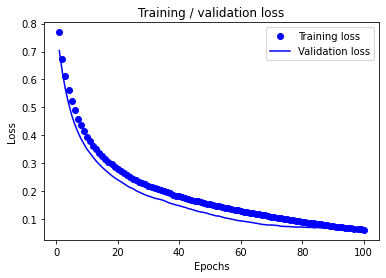

In [ ]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['accuracy']) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training / validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

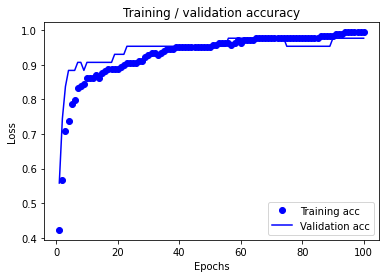

In [ ]:
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training / validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Retrain Model to curb overfitting

In [ ]:
history = model.fit(training_data, training_label, validation_split=0.2, epochs=80, batch_size = 20)

Epoch 1/80
9/9 [==============================] - 0s 16ms/step - loss: 0.0598 - accuracy: 0.9940 - val_loss: 0.0623 - val_accuracy: 0.9767
Epoch 2/80
9/9 [==============================] - 0s 8ms/step - loss: 0.0587 - accuracy: 0.9940 - val_loss: 0.0606 - val_accuracy: 0.9767
Epoch 3/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0571 - accuracy: 0.9940 - val_loss: 0.0594 - val_accuracy: 0.9767
Epoch 4/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0562 - accuracy: 0.9940 - val_loss: 0.0587 - val_accuracy: 0.9767
Epoch 5/80
9/9 [==============================] - 0s 8ms/step - loss: 0.0552 - accuracy: 0.9940 - val_loss: 0.0576 - val_accuracy: 0.9767
Epoch 6/80
9/9 [==============================] - 0s 8ms/step - loss: 0.0537 - accuracy: 0.9940 - val_loss: 0.0581 - val_accuracy: 0.9767
Epoch 7/80
9/9 [==============================] - 0s 7ms/step - loss: 0.0530 - accuracy: 0.9940 - val_loss: 0.0572 - val_accuracy: 0.9767
Epoch 8/80
9/9 [=================

# Evaluation & Prediction

In [ ]:
accuracy_score = model.evaluate(testing_data, testing_label, batch_size=10)
print('accuracy score ', accuracy_score[1] * 100, '%')

14/14 [==============================] - 0s 2ms/step - loss: 0.2766 - accuracy: 0.9286
accuracy score  92.85714030265808 %


In [ ]:
pred_score = model.predict(testing_data)

In [ ]:
pred_label = (pred_score > 0.5)
tf.math.confusion_matrix(
    testing_label, pred_label, num_classes=2, weights=None, dtype=tf.dtypes.int32,name=None)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[47,  8],
       [ 2, 83]], dtype=int32)>

In [ ]:
np.count_nonzero(pred_label)

91